In [18]:
# librerías
from sklearn.ensemble import RandomForestRegressor

# The error metric, In this cas, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# an efficient data structure
import pandas as pd

#improt the data
X = pd.read_csv("data/muestreo_con_indices.csv")
y = X.pop("N_TOTAL")

In [19]:
X.describe()

,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,RVI,CIred_edge,TCARI_OSAVI_RE
count,103.000000,1.030000e+02,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,673202.029126,2.834844e+06,0.082995,5.695013,0.232593,0.708405,0.388072,0.874585,1.163843,0.673851,0.685243,0.277030,8.416358,0.630740,3.319436
std,180.815932,1.675070e+02,0.098731,3.144237,0.074338,0.209601,0.230958,0.231662,0.611857,0.204908,0.153577,0.127663,4.073050,0.242482,2.073623
min,672775.000000,2.834584e+06,0.000000,0.946594,0.072872,0.190868,0.114325,0.497781,0.457698,0.139618,0.321137,0.023695,1.472472,0.157310,1.443111
25%,673038.000000,2.834685e+06,0.005971,3.683149,0.202339,0.717319,0.228642,0.690526,0.709265,0.613101,0.647798,0.264213,6.138221,0.508518,1.805233
50%,673220.000000,2.834850e+06,0.044680,5.228054,0.241367,0.787264,0.262341,0.812516,0.920452,0.730255,0.722919,0.293408,8.407416,0.639023,2.234872
75%,673289.000000,2.834940e+06,0.110703,7.360464,0.286638,0.836202,0.502969,1.005792,1.409804,0.822584,0.786770,0.364038,11.251419,0.805496,4.301772
max,673564.000000,2.835169e+06,0.364412,14.036117,0.356577,0.899692,1.018083,1.664167,3.059144,0.926175,0.875112,0.523345,18.952937,1.109886,9.209865


In [20]:
# if the dataset have NaN values
# X["Column"].fillna(X["Column"].mean(), inplace=True)

# confirm the code is correct
# X.describe()

In [21]:
# get just the numeric variables by selecting only the variables that are not "object" datatypes
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,x,y,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,RVI,CIred_edge,TCARI_OSAVI_RE
0,672991,2834763,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,0.362977,1.520898,0.161725,2.154459
1,673009,2834792,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,0.382892,1.511626,0.167301,2.188258
2,673016,2834822,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,0.348945,1.592500,0.172282,2.167296
3,673030,2834850,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,0.355268,1.736582,0.208449,2.237800
4,673053,2834876,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,0.435488,1.600575,0.221476,2.164132


Looks like the location of the sample could be a wortless variable, but we are goint to leave for a reason. It could be a reference of the place

In [22]:
# letś build our first model. I always have oob_score=True. It is a good idea to increase n_estimators
#  to a number higher than the defaul. in this case the oob_predictions will be based on a forest of 33 trees.
# I set random_state=42 so that you all could replicate the model exactly
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=0)

# I only use numeric_variables because I have yet to dummy out the categorical variables
model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [23]:
# for regression, the oob_score attribute gives the R^2 based on the obb predictions. We want to use c-stat,
# for awareness. By the way, attibutes in skelearn that have a trailing underscore are only available after
# the model has been run
model.oob_score_

0.6449411092862196

In [24]:
# model score
model.score(X[numeric_variables],y)
# if the y is a binary dtype
# y_oob = model.oob_prediction_
# print(c-stat: ", roc_auc_score(y, y_oob))

0.9535460810016358

In [25]:
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for 
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes =="object"]].describe().to_html()))

In [26]:
describe_categorical(X)

,FECHA
count,103
unique,6
top,10/05/17
freq,19


In [27]:
# drop the variables x and y
X.drop(["x", "y"], axis=1, inplace=True)

In [28]:
# change a column variable to be only the first letter or None
# def clean_variable(x):
#    try:
#        return x[0]
#    except TypeError:
#        return "None"
    
# X["Column"] = X.Column.apply(clean_variable)

In [29]:
categorical_variables = ["FECHA"]

for variable in categorical_variables:
    # fill missin data with the word "Missing"
    X[variable].fillna("Missing", inplace=True)
    # create array of dummies
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # update X to include dummies and drop the main variable
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

In [30]:
# look at all the columns in the dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,MCARI_OSAVI,CI_green,NDRE,NDVI,MCARI_OSAVI_RE,MTCI,TCARI_OSAVI,CCCI_simpl,GNDVI,CCCI,RVI,CIred_edge,TCARI_OSAVI_RE,FECHA_09/11/17,FECHA_10/05/17,FECHA_10/10/17,FECHA_10/20/17,FECHA_10/30/17,FECHA_11/22/17
0,0.283920,1.015761,0.074783,0.206467,0.155900,0.691066,1.357306,0.155488,0.336669,0.362977,1.520898,0.161725,2.154459,1,0,0,0,0,0
1,0.274314,0.985348,0.077153,0.203141,0.188865,0.753115,1.316350,0.175170,0.329649,0.382892,1.511626,0.167301,2.188258,1,0,0,0,0,0
2,0.294672,1.093054,0.079282,0.228269,0.164282,0.662644,1.376631,0.192850,0.353286,0.348945,1.592500,0.172282,2.167296,1,0,0,0,0,0
3,0.296775,1.191791,0.094331,0.268019,0.236521,0.704585,1.336456,0.317840,0.372851,0.355268,1.736582,0.208449,2.237800,1,0,0,0,0,0
4,0.239374,1.052623,0.099655,0.230299,0.288989,0.957019,1.114491,0.362056,0.344411,0.435488,1.600575,0.221476,2.164132,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.090330,3.540963,0.200294,0.738790,0.257365,0.646793,0.865050,0.734115,0.639019,0.271103,6.658631,0.500964,1.981615,0,0,0,0,0,1
99,0.110559,3.076807,0.172454,0.705017,0.213970,0.552283,0.861366,0.601739,0.606042,0.244625,5.781926,0.416837,1.783191,0,0,0,0,0,1
100,0.070913,3.647011,0.203406,0.738800,0.203435,0.660791,0.690467,0.748911,0.645765,0.275360,6.662547,0.510708,1.567196,0,0,0,0,0,1
101,0.052702,4.127506,0.214603,0.761693,0.227440,0.691067,0.731164,0.802151,0.673584,0.281747,7.394609,0.546491,1.767288,0,0,0,0,0,1


In [32]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=0)
model.fit(X,y)

print(model.score(X,y))

# binary values in y
#print("c-stat: ", roc_auc_score(y, model.oob_prediction_))

0.9441823430842348


# Variable importance measures

In [33]:
model.feature_importances_

array([4.75613189e-01, 1.95314228e-02, 1.58318200e-02, 5.75389974e-02,
       4.07553109e-02, 2.29187141e-02, 4.90855517e-02, 3.28154748e-02,
       2.50993878e-02, 2.21822765e-02, 5.56865425e-02, 1.15150421e-02,
       1.40508061e-01, 1.09883239e-02, 8.86695302e-05, 3.77775391e-03,
       2.60798499e-03, 9.54092301e-03, 3.91455457e-03])

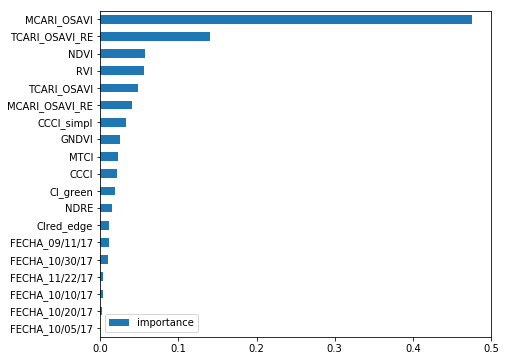

In [34]:
%matplotlib inline
# simple version that shows all of the variables
feature_importances = pd.DataFrame({"importance": model.feature_importances_}, index=X.columns)
feature_importances.sort_values(by=["importance"], inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6))

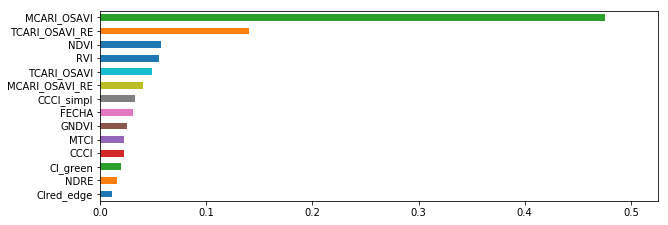

In [35]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
    """
    By Mike Bernico
    
    Graphs the feature importances of a random decision forest using a horizontal bar chart. 
    Probably works but untested on other sklearn.ensembles.
    
    Parameters
    ----------
    ensemble = Name of the ensemble whose features you would like graphed.
    feature_names = A list of the names of those featurs, displayed on the Y axis.
    autoscale = True (Automatically adjust the X axis size to the largest feature +.headroom) / False = scale from 0 to 1
    headroom = used with autoscale, .05 default
    width=figure width in inches
    summarized_columns = a list of column prefixes to summarize on, for dummy variables (e.g. ["day_"] would summarize all day_ vars
    """
    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict)
    results.sort_values(inplace=True)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, X.columns, summarized_columns=categorical_variables)

Parameter tests
Parameters to test

### Parameters that will make your model better
n_estimators: The number of trees in the forest. Choose as high of a number as your computer can handle.
max_features: The number of features to consider when looking for the best split. Try ["auto", "None", "sqrt", "log2", 0.9, and 0.2]
min_samples_leaf: The minimum number of samples in newly created leaves.Try [1, 2, 3]. If 3 is the best, try higher numbers such as 1 through 10.
### Parameters that will make it easier to train your model
n_jobs: Determines if multiple processors should be used to train and test the model. Always set this to -1 and %%timeit vs. if it is set to 1. It should be much faster (especially when many trees are trained).

## n_jobs

In [36]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=0)
model.fit(X,y)

1.23 s ± 65.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=0)
model.fit(X,y)

1.17 s ± 59.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# n_estimators

30 trees
0.9399852927118274

50 trees
0.9443554492720063

100 trees
0.9441823430842345

200 trees
0.9451435213408956

500 trees
0.9460976722371575

1000 trees
0.9465070757349393

2000 trees
0.945943512796233



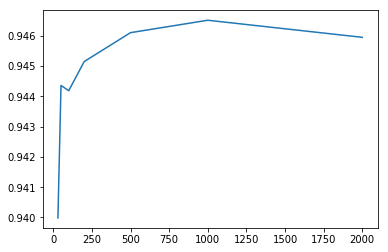

In [38]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=0)
    model.fit(X, y)
    print (trees, "trees")
    # roc = roc_auc_score(y, model.oob_prediction_)
    # print ("C-stat: ", roc)
    print (model.score(X,y))
    results.append(model.score(X,y))
    print ("")
    
pd.Series(results, n_estimator_options).plot();

# max_features

auto option
0.9443460638079048

None option
0.9443460638079048

sqrt option
0.944141604749336

log2 option
0.944141604749336

0.9 option
0.9440838923052256

0.2 option
0.9433143938594819



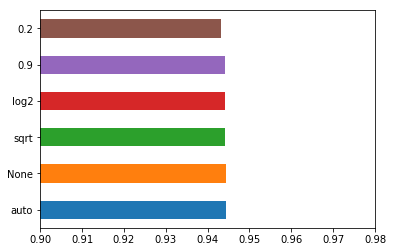

In [42]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print (max_features, "option")
    # roc = roc_auc_score(y, model.oob_prediction_)
    # print ("C-stat: ", roc)
    print (model.score(X,y))
    results.append(model.score(X,y))
    print ("")
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.9,.98));


# min_samples_leaf

1 min samples
0.9443460638079048

2 min samples
0.9053028279910892

3 min samples
0.8608538709214706

4 min samples
0.8227156729610472

5 min samples
0.7961286532176685

6 min samples
0.772378966424643

7 min samples
0.7497694548810792

8 min samples
0.731392739514959

9 min samples
0.7140955768246163

10 min samples
0.697885297663434



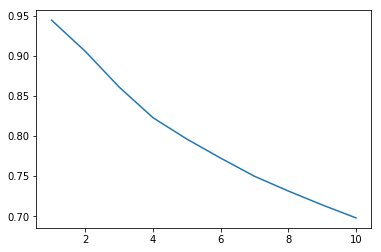

In [41]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print (min_samples, "min samples")
    # roc = roc_auc_score(y, model.oob_prediction_)
    # print ("C-stat: ", roc)
    print (model.score(X,y))
    results.append(model.score(X,y))
    print ("")
    
pd.Series(results, min_samples_leaf_options).plot();

# Final Model

In [43]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=0, 
                              max_features="auto", 
                              min_samples_leaf=1)
model.fit(X, y)

print (model.score(X,y))
# roc = roc_auc_score(y, model.oob_prediction_)
# print ("C-stat: ", roc)

0.9465070757349393


In [44]:
# Make train and test datasets
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test).round(2))

R^2: 0.3


In [46]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test).round(2))

R^2: 0.43


In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print ("R^2:", model.score(X_test, y_test).round(2))

R^2: 0.41


In [48]:
data = pd.DataFrame({"N_TOTAL": y, "Pred": model.predict(X)})

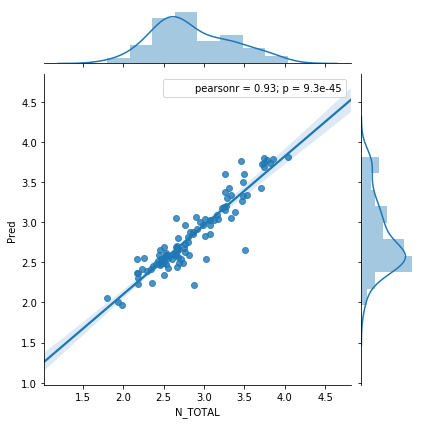

In [49]:
import seaborn as sns
sns.jointplot("N_TOTAL", "Pred", data=data, kind="reg")

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
scores  

array([-1.30702011, -0.49884663,  0.21314355, -1.09322944, -0.68512283])

In [51]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.67 (+/- 1.06)


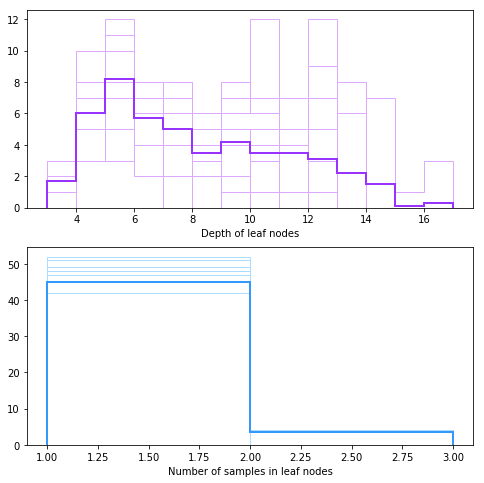

In [53]:
from sklearn.tree import _tree, export_graphviz
import matplotlib.pyplot as plt
def leaf_depths(tree, node_id = 0):
    
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == _tree.TREE_LEAF:
        
        depths = np.array([0])

    else:
        
        left_depths = leaf_depths(tree, left_child) + 1
        right_depths = leaf_depths(tree, right_child) + 1

        depths = np.append(left_depths, right_depths)

    return depths

def leaf_samples(tree, node_id = 0):
    
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]

    if left_child == _tree.TREE_LEAF:
        
        samples = np.array([tree.n_node_samples[node_id]])

    else:
        
        left_samples = leaf_samples(tree, left_child)
        right_samples = leaf_samples(tree, right_child)

        samples = np.append(left_samples, right_samples)

    return samples

def draw_tree(ensemble, tree_id=0):

    plt.figure(figsize=(8,8))
    plt.subplot(211)

    tree = ensemble.estimators_[tree_id].tree_

    depths = leaf_depths(tree)
    plt.hist(depths, histtype='step', color='#9933ff', 
             bins=range(min(depths), max(depths)+1))

    plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)
    
    plt.subplot(212)
    
    samples = leaf_samples(tree)
    plt.hist(samples, histtype='step', color='#3399ff', 
             bins=range(min(samples), max(samples)+1))
    
    plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)
    
    plt.show()

def draw_ensemble(ensemble):

    plt.figure(figsize=(8,8))
    plt.subplot(211)

    depths_all = np.array([], dtype=int)

    for x in ensemble.estimators_:
        tree = x.tree_
        depths = leaf_depths(tree)
        depths_all = np.append(depths_all, depths)
        plt.hist(depths, histtype='step', color='#ddaaff', 
                 bins=range(min(depths), max(depths)+1))

    plt.hist(depths_all, histtype='step', color='#9933ff', 
             bins=range(min(depths_all), max(depths_all)+1), 
             weights=np.ones(len(depths_all))/len(ensemble.estimators_), 
             linewidth=2)
    plt.xlabel("Depth of leaf nodes")
    
    samples_all = np.array([], dtype=int)
    
    plt.subplot(212)
    
    for x in ensemble.estimators_:
        tree = x.tree_
        samples = leaf_samples(tree)
        samples_all = np.append(samples_all, samples)
        plt.hist(samples, histtype='step', color='#aaddff', 
                 bins=range(min(samples), max(samples)+1))
    
    plt.hist(samples_all, histtype='step', color='#3399ff', 
             bins=range(min(samples_all), max(samples_all)+1), 
             weights=np.ones(len(samples_all))/len(ensemble.estimators_), 
             linewidth=2)
    plt.xlabel("Number of samples in leaf nodes")
    
    plt.show()

draw_ensemble(model)

In [54]:
# model tree
model.estimators_[0]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1608637542, splitter='best')

In [71]:
from sklearn import tree
from sklearn.tree import export_graphviz
import os

export_graphviz(model.estimators_[0],
                feature_names=X.columns,
                filled=True,
                rounded=True)
os.system('dot -Tpng tree.dot -o tree.png')

/home/jorge/anaconda3/lib/python3.5/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


0